In [1]:

import numpy as np
import pandas as pd
import os

In [2]:
def load_images_train(path):
    classes = ['PNEUMONIA','NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(path+'/'+i)
        c = 0
        for j in l2:
            img = Image.open(path+i+'/'+j).convert('RGB')
            img = img.resize(size=(32,32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
    return np.array(imgs),labels

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [4]:
x_train,y_train = load_images_train("D:/dl/chest_xray/chest_xray/train/")

In [5]:
print(x_train.shape)

(5216, 32, 32, 3)


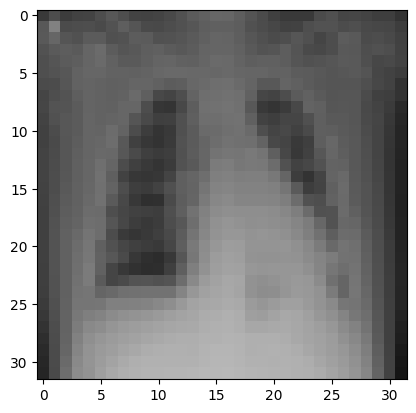

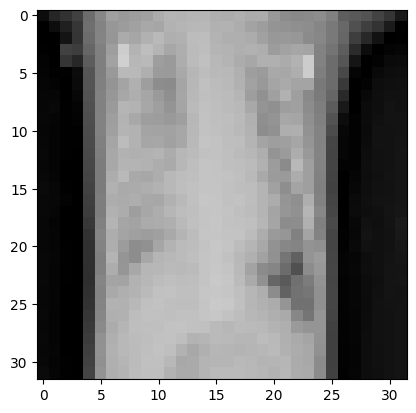

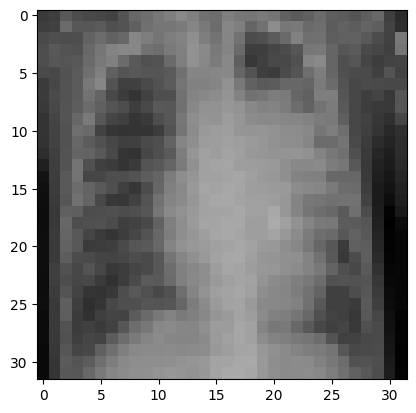

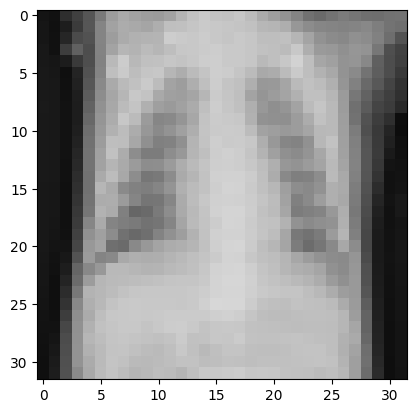

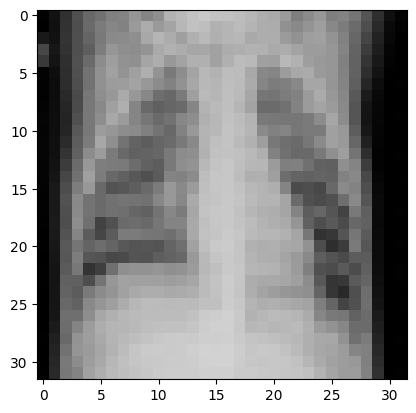

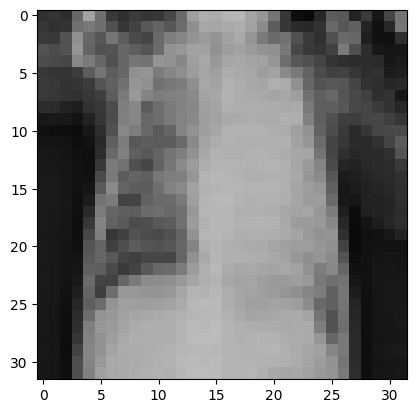

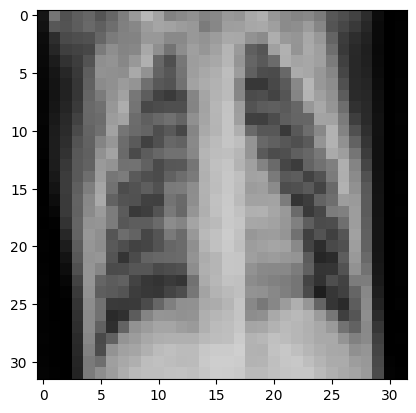

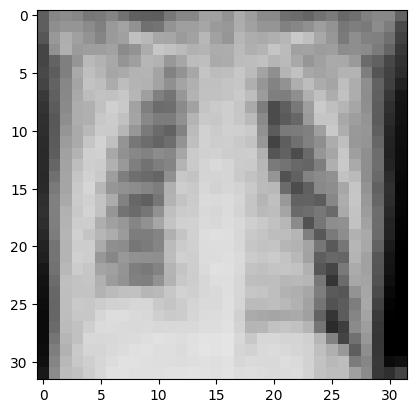

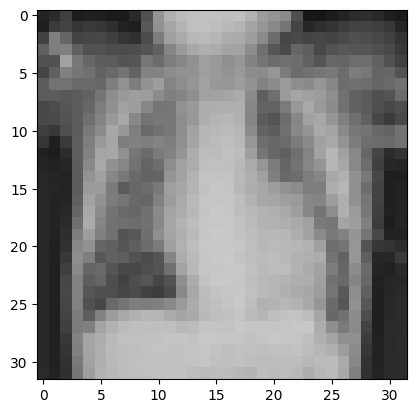

In [6]:
import random
for i in range(1, 10):
  n = random.randint(0,1000)
  plt.imshow(x_train[n])
  plt.show()
  # predicted_value = model.predict(x_test)

In [7]:
target=pd.Series(y_train,dtype='category')
target

0       PNEUMONIA
1       PNEUMONIA
2       PNEUMONIA
3       PNEUMONIA
4       PNEUMONIA
          ...    
5211       NORMAL
5212       NORMAL
5213       NORMAL
5214       NORMAL
5215       NORMAL
Length: 5216, dtype: category
Categories (2, object): ['NORMAL', 'PNEUMONIA']

In [8]:
t=target.cat.codes
t

0       1
1       1
2       1
3       1
4       1
       ..
5211    0
5212    0
5213    0
5214    0
5215    0
Length: 5216, dtype: int8

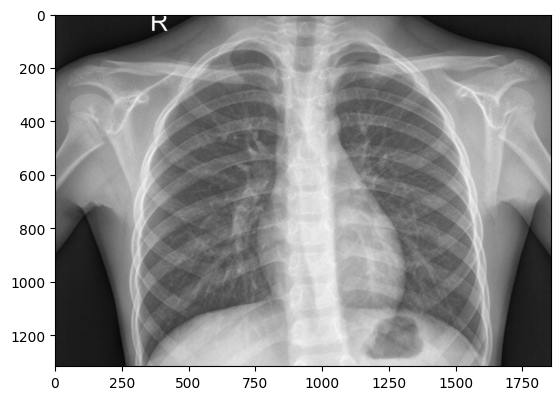

In [9]:
from PIL import Image
testim = Image.open("D:/dl/chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg").convert('RGB')
plt.imshow(testim)

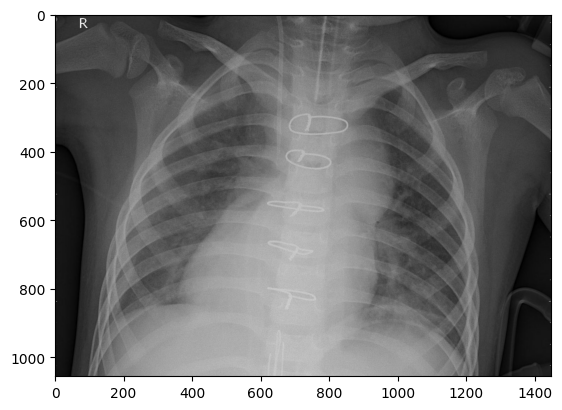

In [10]:
from PIL import Image
path = "D:/dl/chest_xray/chest_xray/train/PNEUMONIA/person2_bacteria_3.jpeg"
testim = Image.open(path).convert('RGB')
plt.imshow(testim)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Activation

In [12]:
model = Sequential()
model.add(Conv2D(16,activation="relu",kernel_size=3,input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Activation("relu"))
model.add(Conv2D(32,activation="relu",kernel_size=3))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,activation="relu",kernel_size=3))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,activation="relu",kernel_size=3))
model.add(MaxPooling2D((2,2),padding='same'))

In [13]:
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(2,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 activation (Activation)     (None, 15, 15, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          1

In [14]:
 history = model.fit(x_train,t,epochs=20)

Epoch 1/20
163/163 [==============================] - 3s 15ms/step - loss: 0.6861 - accuracy: 0.8556
Epoch 2/20
163/163 [==============================] - 2s 13ms/step - loss: 0.1556 - accuracy: 0.9419
Epoch 3/20
163/163 [==============================] - 2s 13ms/step - loss: 0.1143 - accuracy: 0.9597
Epoch 4/20
163/163 [==============================] - 2s 13ms/step - loss: 0.1058 - accuracy: 0.9590
Epoch 5/20
163/163 [==============================] - 3s 15ms/step - loss: 0.0942 - accuracy: 0.9636
Epoch 6/20
163/163 [==============================] - 3s 15ms/step - loss: 0.0808 - accuracy: 0.9730
Epoch 7/20
163/163 [==============================] - 3s 16ms/step - loss: 0.0741 - accuracy: 0.9716
Epoch 8/20
163/163 [==============================] - 2s 15ms/step - loss: 0.0741 - accuracy: 0.9743
Epoch 9/20
163/163 [==============================] - 2s 15ms/step - loss: 0.0645 - accuracy: 0.9781
Epoch 10/20
163/163 [==============================] - 2s 15ms/step - loss: 0.0625 - accura

In [15]:
def load_images_test(path):
    classes = ['PNEUMONIA','NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(path+'/'+i)
        c = 0
        for j in l2:
            img = Image.open(path+i+'/'+j).convert('RGB')
            img = img.resize(size=(32,32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
    return np.array(imgs),labels

In [16]:
x_test,y_test = load_images_test("D:/dl/chest_xray/chest_xray/test/")


In [17]:
target1=pd.Series(y_test,dtype='category')
target1

0      PNEUMONIA
1      PNEUMONIA
2      PNEUMONIA
3      PNEUMONIA
4      PNEUMONIA
         ...    
619       NORMAL
620       NORMAL
621       NORMAL
622       NORMAL
623       NORMAL
Length: 624, dtype: category
Categories (2, object): ['NORMAL', 'PNEUMONIA']

In [18]:
t1=target1.cat.codes
t1

0      1
1      1
2      1
3      1
4      1
      ..
619    0
620    0
621    0
622    0
623    0
Length: 624, dtype: int8

In [35]:
y_pred = model.predict(x_test)
y_pred

20/20 [==============================] - 0s 5ms/step


array([[5.4897331e-10, 1.0000000e+00],
       [1.5667640e-04, 9.9984324e-01],
       [2.2640720e-12, 1.0000000e+00],
       ...,
       [4.0440216e-05, 9.9995959e-01],
       [2.6048763e-06, 9.9999738e-01],
       [2.6813266e-04, 9.9973184e-01]], dtype=float32)

In [20]:
def names(number):
    if number==1:
        return " Pneumonia"
    elif number==0:
        return " Normal"

In [21]:
from matplotlib.pyplot import imshow
def Prediction(im):
    x = np.array(im.resize((32,32)))
    x = x.reshape(1,32,32,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(im)
    print(str(res[0][classification]*100) + '% Confidence of ' + names(classification))

99.99997615814209% Confidence of  Pneumonia


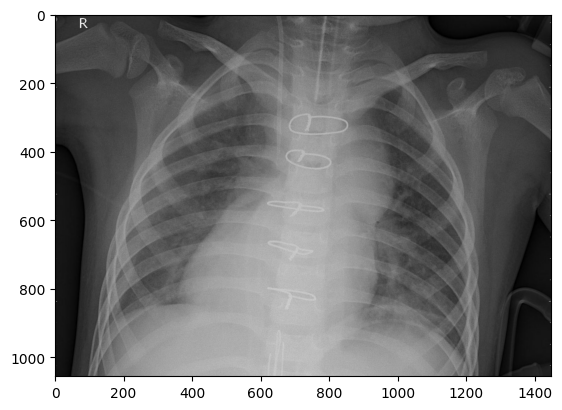

In [22]:
testim = Image.open("D:/dl/chest_xray/chest_xray/train/PNEUMONIA/person2_bacteria_3.jpeg").convert('RGB')
Prediction(testim)

62.41416931152344% Confidence of  Normal


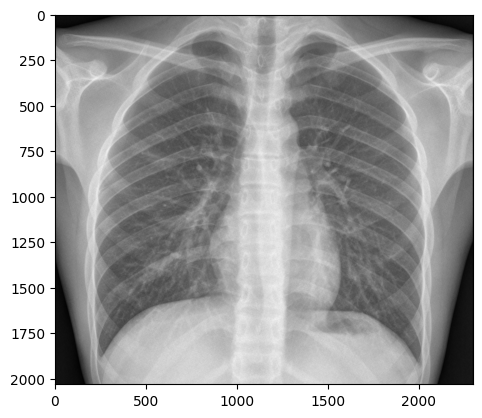

In [23]:
testim = Image.open("D:/dl/chest_xray/chest_xray/test/NORMAL/IM-0043-0001.jpeg").convert('RGB')
Prediction(testim)

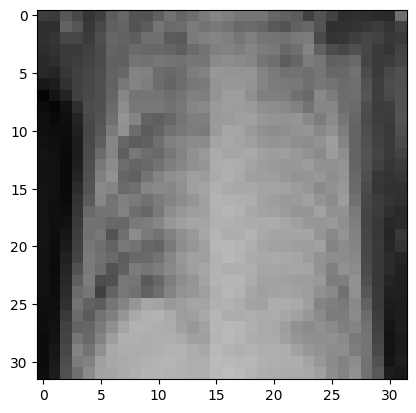

In [24]:
plt.imshow(x_test[4])

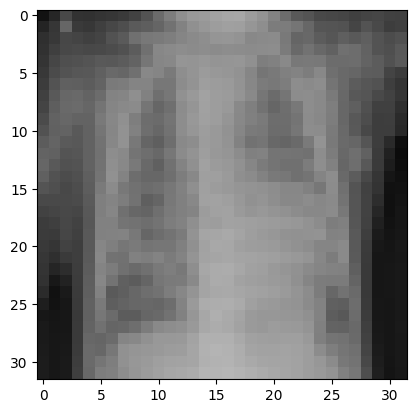

20/20 [==============================] - 0s 9ms/step
Pnuemonia detected


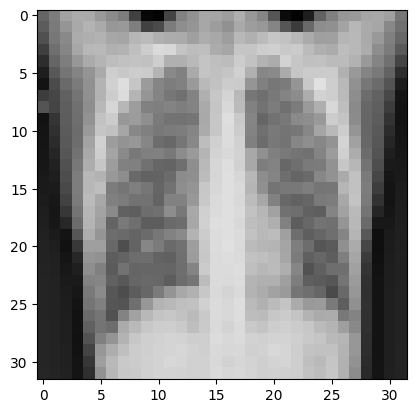

20/20 [==============================] - 0s 9ms/step
No pnuemonia Detected


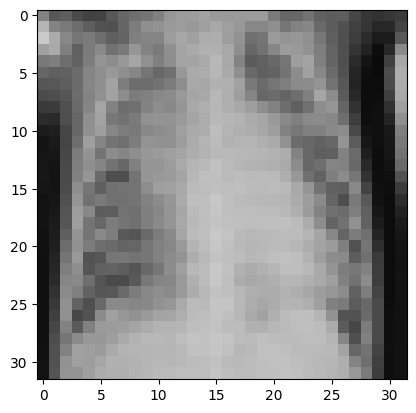

20/20 [==============================] - 0s 9ms/step
Pnuemonia detected


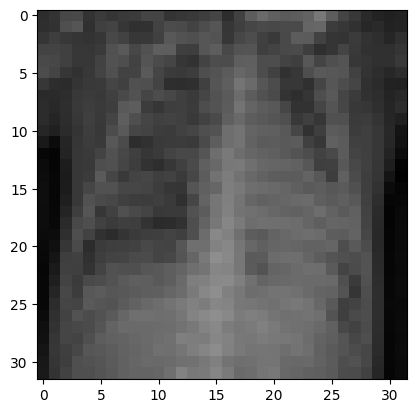

20/20 [==============================] - 0s 8ms/step
Pnuemonia detected


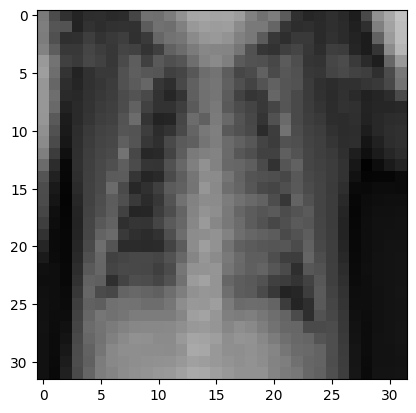

20/20 [==============================] - 0s 7ms/step
Pnuemonia detected


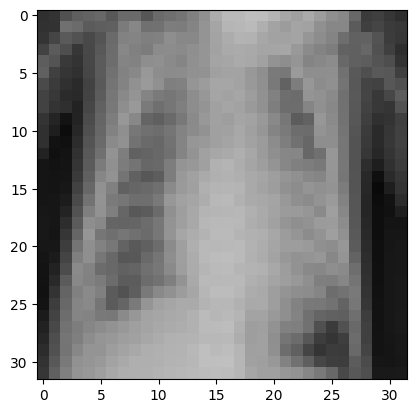

20/20 [==============================] - 0s 9ms/step
Pnuemonia detected


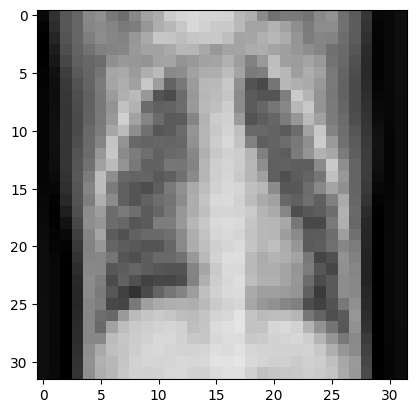

20/20 [==============================] - 0s 9ms/step
Pnuemonia detected


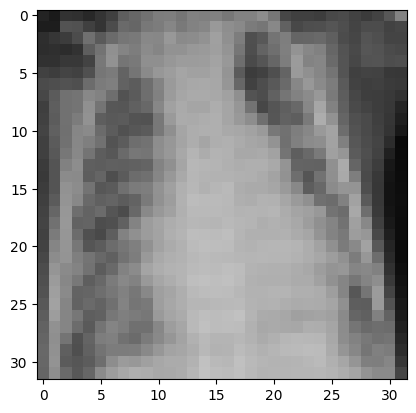

20/20 [==============================] - 0s 9ms/step
Pnuemonia detected


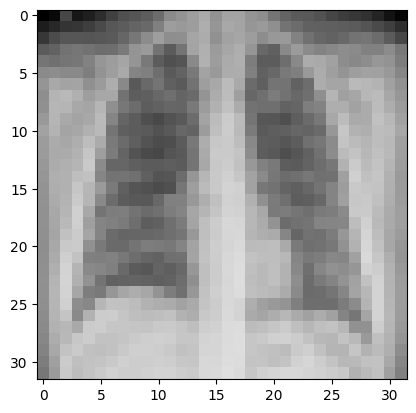

20/20 [==============================] - 0s 9ms/step
No pnuemonia Detected


In [37]:
import random
for i in range(1, 10):
    n = random.randint(0,500)
    img = plt.imshow(x_test[n])
    plt.imshow(x_test[n])
    plt.show()
#   Prediction(img)
    predicted_value = model.predict(x_test)
    if(predicted_value[n][1] == 1.0000000e+00):
        print("Pnuemonia detected")
    elif(predicted_value[n][0] > predicted_value[n][1]):
        print("No pnuemonia Detected")
    else:
        print("Pnuemonia detected")
#     classification = np.where(predicted_value == np.amax(predicted_value))[0][0]
# #     imshow(im)
#     print(str(predicted_value[0][classification]*100) + '% Confidence of ' + names(classification))
#     print(predicted_value[n][1])
#   print()

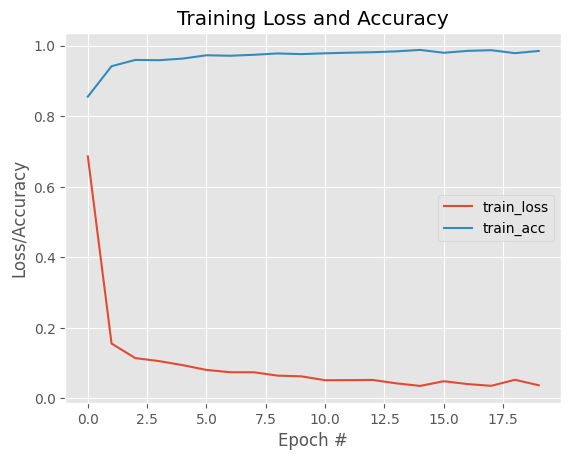

In [38]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()